### Presentation

https://www.canva.com/design/DAG39fzgxmc/sAn7c0RZ8JeIX1lydfgteg/edit?utm_content=DAG39fzgxmc&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

The CallMeMaybe virtual telephone service seeks to identify the least effective operators within its network.

An operator is considered ineffective when they have a high number of missed calls, long waiting times, and, in cases where they must make outgoing calls, little activity in that type of call.

The objective of this analysis is to detect patterns of inefficiency, visualize operator performance, and provide useful information for service improvement.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats as st 

In [ ]:
calls = pd.read_csv('telecom_dataset_new.csv')

clients = pd.read_csv('telecom_clients.csv')

In [ ]:
calls.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [ ]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [ ]:
calls[calls['is_missed_call'] % 1 != 0]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration


In [ ]:
calls = calls.dropna()
calls['date'] = pd.to_datetime(calls['date'])
calls['only_date'] = calls['date'].dt.date
calls['only_date'] = pd.to_datetime(calls['only_date'])
calls['only_time'] = calls['date'].dt.time
calls['operator_id'] = calls['operator_id'].astype('Int64')
calls['user_id'] = calls['user_id'].astype('object')

calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45670 entries, 1 to 53900
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              45670 non-null  object                               
 1   date                 45670 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            45670 non-null  object                               
 3   internal             45670 non-null  object                               
 4   operator_id          45670 non-null  Int64                                
 5   is_missed_call       45670 non-null  bool                                 
 6   calls_count          45670 non-null  int64                                
 7   call_duration        45670 non-null  int64                                
 8   total_call_duration  45670 non-null  int64                                
 9   only_d

Delete the data where we did not have the operator ID, as it makes no sense to take that data into account if we do not know who it is.

In [ ]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [ ]:
clients['user_id'] = clients['user_id'].astype('object')
clients['date_start'] = pd.to_datetime(clients['date_start'])

clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    object        
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 17.3+ KB


In [ ]:
calls.describe().round(2)

,operator_id,calls_count,call_duration,total_call_duration
count,45670.0,45670.00,45670.00,45670.00
mean,916529.3,16.93,1010.93,1323.70
std,21258.4,59.08,4017.10,4735.34
min,879896.0,1.00,0.00,0.00
25%,900788.0,1.00,0.00,68.00
50%,913938.0,4.00,107.00,291.00
75%,937708.0,14.00,774.00,1112.00
max,973286.0,4817.00,144395.00,166155.00


In [ ]:
duration_0 = (len(calls[calls['call_duration']== 0]) / len(calls)) * 100

In [ ]:
print(f"There are {calls['user_id'].nunique()} customers")
print(f"There are {calls['operator_id'].nunique()} operators")
print()
print(f"There are {(calls['direction'] == 'in').sum() } incoming calls")
print(f"There are {(calls['direction'] == 'out').sum()} outgoing calls")
print()
print(f"There are {(calls['internal'] == True).sum()} internal calls")
print(f"There are {(calls['internal'] == False).sum()} external calls")
print()
print(f"There is a {calls['is_missed_call'].mean() * 100:.2f}% of missed calls")
print(f"There is a {duration_0:.2f}% of calls with a duration of 0")

There are 290 customers
There are 1092 operators

There are 13953 incoming calls
There are 31717 outgoing calls

There are 5809 internal calls
There are 39861 external calls

There is a 33.98% of missed calls
There is a 33.31% of calls with a duration of 0


The percentage of missed calls matches the number of calls with a duration of 0. 

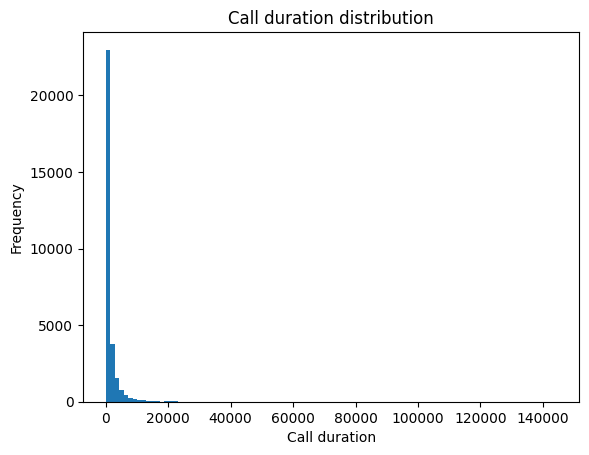

In [ ]:
calls_nonzero = calls[calls['call_duration'] > 0]

plt.hist(calls_nonzero['call_duration'], bins=100)
plt.title('Call duration distribution')
plt.xlabel('Call duration')
plt.ylabel('Frequency')
plt.show()

We see that call durations vary greatly, although we find many outliers that may be important to investigate. 

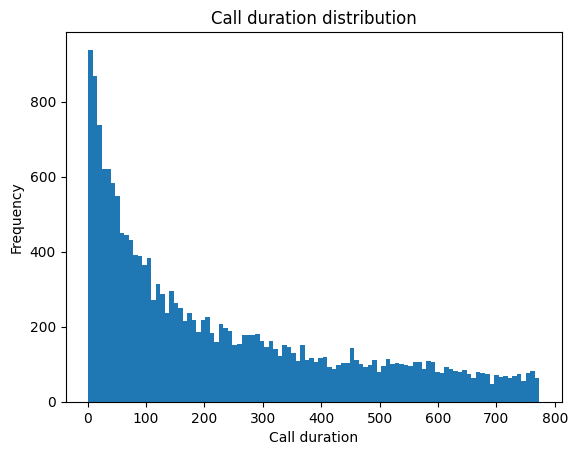

In [ ]:
calls_nonzero_774 = calls[(calls['call_duration'] > 0) & (calls['call_duration'] < 774)]

plt.hist(calls_nonzero_774['call_duration'], bins=100)
plt.title('Call duration distribution')
plt.xlabel('Call duration')
plt.ylabel('Frequency')
plt.show()

Although we have calls up to 144,395, these are abnormal calls; 75% of calls are between 1 and 774. 

In [ ]:
out_calls = calls[calls['direction'] == 'out']
out_calls_per_operator = (
    out_calls
    .groupby('operator_id')['direction']
    .count()
    .reset_index(name='out_calls_count')
    .sort_values(by='out_calls_count', ascending=False)
)
out_calls_per_operator

,operator_id,out_calls_count
164,901884,246
24,885876,216
163,901880,216
27,887276,215
68,891414,212
...,...,...
681,945074,1
682,945274,1
291,914256,1
263,909452,1


In [ ]:
out_calls_per_operator.describe().round(2)

,operator_id,out_calls_count
count,882.00,882.00
mean,925658.34,35.96
std,22862.56,41.97
min,879896.00,1.00
25%,906394.50,5.00
50%,924959.00,21.00
75%,943630.00,49.75
max,973120.00,246.00


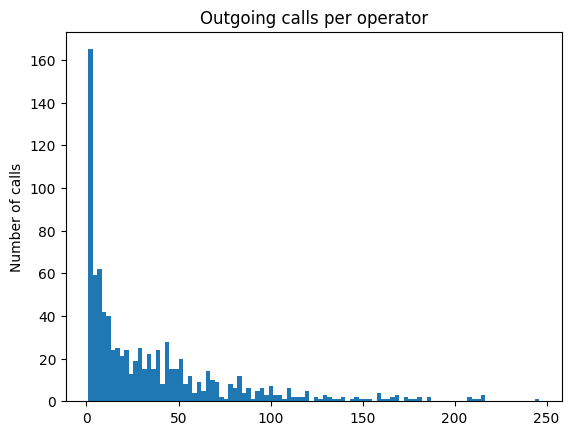

In [ ]:
plt.hist(out_calls_per_operator['out_calls_count'], bins=100)
plt.title('Outgoing calls per operator')
plt.ylabel('Number of calls')
plt.show()

The data shows that 25% of operators handled fewer than 5 outgoing calls, whereas the majority handled around 21. This suggests that managing **fewer than 5 outgoing calls may indicate operator inefficiency.**

In [ ]:
operators = calls.groupby('operator_id').agg({
    'calls_count': 'sum',      
    'is_missed_call': 'sum',       
    'call_duration': 'mean',       
    'total_call_duration': 'mean'  
})
operators['pct_missed_calls'] = ((operators['is_missed_call'] / operators['calls_count']) * 100).round(2)
operators['avg_wait_time'] = (operators['total_call_duration'] - operators['call_duration']).round(2)
out_calls = calls[calls['direction'] == 'out'].groupby('operator_id')['direction'].count()
operators['out_calls'] = out_calls
operators['call_duration'] = operators['call_duration'].round(2)
operators['total_call_duration'] = operators['call_duration'].round(2)
operators.head()

,calls_count,is_missed_call,call_duration,total_call_duration,pct_missed_calls,avg_wait_time,out_calls
operator_id,,,,,,,
879896,1131,50,650.48,650.48,4.42,110.67,105.0
879898,7973,100,1115.50,1115.50,1.25,451.86,187.0
880020,54,7,104.09,104.09,12.96,15.18,14.0
880022,219,33,240.84,240.84,15.07,57.57,68.0
880026,2439,94,856.94,856.94,3.85,121.17,179.0


In [ ]:
operators.describe().round(2)

,calls_count,is_missed_call,call_duration,total_call_duration,pct_missed_calls,avg_wait_time,out_calls
count,1092.00,1092.00,1092.00,1092.00,1092.00,1092.00,882.00
mean,707.85,14.21,649.15,649.15,10.06,215.60,35.96
std,3181.52,20.36,1197.52,1197.52,16.88,504.97,41.97
min,1.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,11.00,1.00,76.66,76.66,0.83,23.06,5.00
50%,78.50,6.00,240.04,240.04,4.31,46.26,21.00
75%,558.00,21.00,659.83,659.83,12.13,155.54,49.75
max,66049.00,135.00,14620.55,14620.55,100.00,5907.44,246.00


## Factors of inefficiency
    - Fewer than 5 outgoing calls
    - More than 12.13% missing calls
    - More than 155.54 average waiting time

We will consider an operator to be inefficient if it meets two or more of these characteristics.

In [ ]:
operators['few_out_calls'] = operators['out_calls'] < 5
operators['many_missed_calls'] = operators['pct_missed_calls'] > 12.13
operators['high_wait_time'] = operators['avg_wait_time'] > 155.54

operators['inefficiency_score'] = (
    operators['few_out_calls'].astype(int) +
    operators['many_missed_calls'].astype(int) +
    operators['high_wait_time'].astype(int)
)

operators['status'] = np.where(operators['inefficiency_score'] >= 2, 'inefficient', 'efficient')

operators = operators.drop(columns=['few_out_calls', 'many_missed_calls', 'high_wait_time'])

operators

,calls_count,is_missed_call,call_duration,total_call_duration,pct_missed_calls,avg_wait_time,out_calls,inefficiency_score,status
operator_id,,,,,,,,,
879896,1131,50,650.48,650.48,4.42,110.67,105.0,0,efficient
879898,7973,100,1115.50,1115.50,1.25,451.86,187.0,1,efficient
880020,54,7,104.09,104.09,12.96,15.18,14.0,1,efficient
880022,219,33,240.84,240.84,15.07,57.57,68.0,1,efficient
880026,2439,94,856.94,856.94,3.85,121.17,179.0,0,efficient
...,...,...,...,...,...,...,...,...,...
972410,77,2,944.25,944.25,2.60,374.50,4.0,2,inefficient
972412,61,2,699.60,699.60,3.28,210.00,4.0,2,inefficient
972460,70,3,257.89,257.89,4.29,89.00,7.0,0,efficient


In [ ]:
status_counts = operators['status'].value_counts()

status_counts

efficient      969
inefficient    123
Name: status, dtype: int64

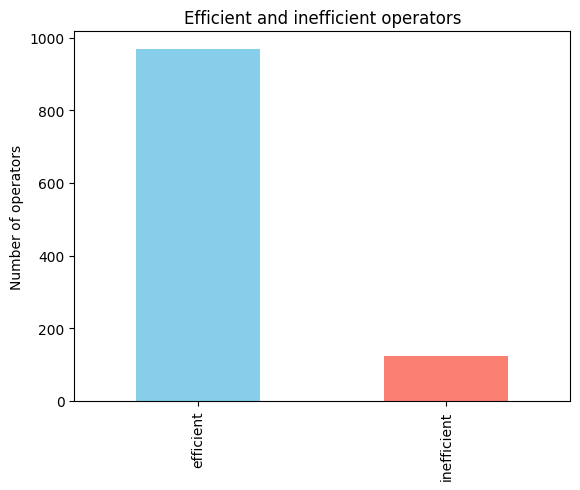

In [ ]:
status_counts.plot(kind='bar', 
               title='Efficient and inefficient operators', 
                color=['skyblue', 'salmon'],
               ylabel='Number of operators') 
plt.show() 

### Hypothesis

**H₀ (null):** There is no significant difference in average waiting time between efficient and inefficient operators.

**H₁ (alternative):** Inefficient operators have a longer average waiting time than efficient operators.

In [ ]:
efficient = operators[operators['status'] == 'efficient']['avg_wait_time']
inefficient = operators[operators['status'] == 'inefficient']['avg_wait_time']

alpha = 0.05

t_stat, p_value = st.ttest_ind(efficient, inefficient)

print('t-statistic:', t_stat)
print('p-value:', p_value)

if (t_stat > 0) and (p_value / 2 < alpha):
    print('We reject the null hypothesis: Inefficient operators have a significantly longer average waiting time.')
else:
    print('We cannot reject the null hypothesis: There is no significant evidence that inefficient operators have a longer waiting time.')

t-statistic: 3.666637769828364
p-value: 0.0002576143565555145
We reject the null hypothesis: Inefficient operators have a significantly longer average waiting time.


### Final Conclusion

After analyzing the performance of the operators using the CallMeMaybe dataset, we identified the main factors that define inefficiency among operators:

**Factors of Inefficiency**

An operator is considered inefficient if they meet two or more of the following conditions:

    - Have fewer than 5 outgoing calls.
    - Have more than 12.13% of missed calls.
    - Have an average waiting time greater than 155.54 seconds.

**Key Findings**

Most inefficient operators showed significantly longer waiting times, confirming that poor efficiency is often associated with delays in handling incoming calls.

The hypothesis test (t-test) demonstrated a statistically significant difference in average waiting time between efficient and inefficient operators (p-value < 0.05), supporting the idea that waiting time is a reliable indicator of inefficiency.

Inefficient operators also tended to have a higher proportion of missed calls, suggesting potential issues with workload management or responsiveness.

**Insights for Improvement**

Training and resource optimization should be focused on operators with high waiting times and missed call percentages.

Real-time monitoring dashboards can help supervisors detect performance drops early and redistribute calls more effectively.

Establishing minimum targets for outgoing calls may encourage more proactive communication behavior among operators.